 # COVID-19 Predicting outbreak in India with Machine Learning

In [2]:
import pandas as pd
import numpy as np
%pylab inline
#visulization libraries
import matplotlib.pyplot as plt

#mcahine learning library
import sklearn
from sklearn.linear_model import LinearRegression

#imorting preprocessing methods from sklearn
from sklearn.model_selection import train_test_split


Populating the interactive namespace from numpy and matplotlib


In [4]:
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,853,853,853,853,854,854,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,113,118,130,138,140,142,148,155,166,172


In [5]:
#reading coronavirus deaths reported across the city
deaths_reported=pd.read_csv('time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,405,426,446,451,471,478,491,504,546,548
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,35,36,36,36,36,37,38,39,42
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,732,741,751,760,767,777,788,799,811,825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,5,6,6,6,6,7,8,8


In [6]:
#reading coronavirus recovered cases across the world
recovered_cases=pd.read_csv('time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,980,1001,1034,1039,1044,1055,1064,1077,1086,1114
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,759,780,781,781,781,789,789,791,792,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,40,41,42,61,61,64,64,64,64,66


In [7]:
cols=confirmed_cases.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20',
       '6/16/20', '6/17/20', '6/18/20', '6/19/20'],
      dtype='object', length=154)


In [8]:
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,0,0,0,0,0,0,0,0,0,0,...,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878
1,0,0,0,0,0,0,0,0,0,0,...,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838
2,0,0,0,0,0,0,0,0,0,0,...,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504
3,0,0,0,0,0,0,0,0,0,0,...,852,852,853,853,853,853,854,854,855,855
4,0,0,0,0,0,0,0,0,0,0,...,113,118,130,138,140,142,148,155,166,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,611,632,639,659,661,662,671,683,688,693
262,0,0,0,0,0,0,0,0,0,0,...,560,591,632,705,728,844,885,902,909,919
263,0,0,0,0,0,0,0,0,0,0,...,162,162,163,176,176,176,197,197,210,210
264,0,0,0,0,0,0,0,0,0,0,...,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338


In [9]:
recovered=recovered_cases.loc[:,cols[4]:cols[-1]]
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,0,0,0,0,0,0,0,0,0,0,...,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962
1,0,0,0,0,0,0,0,0,0,0,...,980,1001,1034,1039,1044,1055,1064,1077,1086,1114
2,0,0,0,0,0,0,0,0,0,0,...,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196
3,0,0,0,0,0,0,0,0,0,0,...,759,780,781,781,781,789,789,791,792,792
4,0,0,0,0,0,0,0,0,0,0,...,40,41,42,61,61,64,64,64,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,135,146,156,176,177,177,182,188,191,199
249,0,0,0,0,0,0,0,0,0,0,...,23,23,28,39,53,79,91,271,273,288
250,0,0,0,0,0,0,0,0,0,0,...,97,97,97,114,114,114,127,127,129,129
251,0,0,0,0,0,0,0,0,0,0,...,2947,3062,3158,3288,3409,3503,3624,3700,3762,3830


In [10]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,0,0,0,0,0,0,0,0,0,0,...,405,426,446,451,471,478,491,504,546,548
1,0,0,0,0,0,0,0,0,0,0,...,34,35,36,36,36,36,37,38,39,42
2,0,0,0,0,0,0,0,0,0,0,...,732,741,751,760,767,777,788,799,811,825
3,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,4,5,5,6,6,6,6,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
262,0,0,0,0,0,0,0,0,0,0,...,129,136,139,160,164,208,214,244,248,251
263,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,5,5
264,0,0,0,0,0,0,0,0,0,0,...,48,49,49,50,50,50,50,51,51,51


In [11]:
dates=confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20',
       '6/16/20', '6/17/20', '6/18/20', '6/19/20'],
      dtype='object', length=150)

In [12]:
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
india_cases=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    #print(confirmed[i])
    death_sum=deaths[i].sum()
    recovered_sum=recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    #india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())

In [13]:
print(confirmed_sum)
print(death_sum)
print(recovered_sum)
print(world_cases)

8663135
460005
4245777
[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79525, 80372, 81346, 82704, 84070, 85967, 88325, 90262, 92795, 95075, 97844, 101761, 105782, 109754, 113536, 118375, 125704, 130909, 145204, 156283, 167022, 181452, 196917, 216161, 243084, 272698, 304844, 337597, 378381, 418569, 468155, 530138, 594178, 661544, 720695, 783580, 858317, 933905, 1014713, 1097193, 1177447, 1251123, 1322598, 1397537, 1481490, 1567423, 1659674, 1737813, 1836615, 1906692, 1977287, 2057584, 2153578, 2242537, 2316591, 2399451, 2472264, 2546905, 2622750, 2711635, 2799064, 2884420, 2958352, 3027215, 3101078, 3176596, 3261450, 3349915, 3432050, 3511157, 3587874, 3668635, 3760836, 3851895, 3945002, 4030363, 4108270, 4184838, 4268247, 4353211, 4451126, 4548549, 4641727, 4721968, 4810315, 4906193, 5005761, 5112366, 5220585, 532102

In [14]:
#changing dates into days
v=1
day_date=[]
for i in range(len(dates)):
    v=i*1
    day_date.append(v)
day_date

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

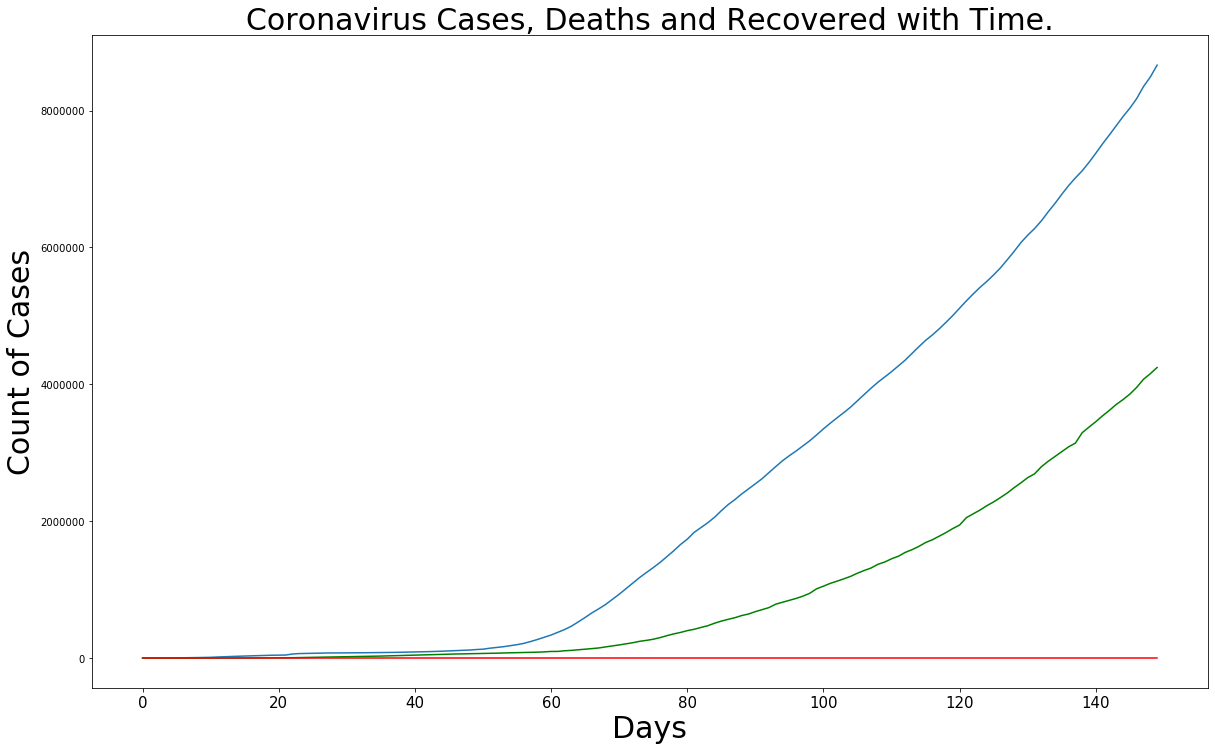

In [15]:
#plotting the cases (confirmed, recover and deaths) with time
plt.figure(figsize(20,12))
plt.plot(day_date,world_cases)
plt.plot(day_date,total_recovered,color='green')
plt.plot(day_date,total_deaths,color='red')
plt.title("Coronavirus Cases, Deaths and Recovered with Time.",size=30)
plt.xlabel('Days',size=30)
plt.ylabel('Count of Cases',size=30)
plt.xticks(size=15)
plt.xticks(size=15)
plt.show()

In [16]:
#check each day cases to world
def eachday_increase(records):
    d=[]
    for i in range(len(records)):
        if i==0:
            d.append(records[0])
        else:
            d.append(records[i]-records[i-1])
    return d

In [18]:
world_daily_increase=eachday_increase(world_cases)
#world_daily_increase
print(type(world_cases))

<class 'list'>


In [19]:
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)
print(world_cases.size)
days=np.array(day_date).reshape(-1,1)
print(world_cases.shape)

150
(150, 1)


In [20]:
days_in_future=10
future_forcast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjust_dates=future_forcast[:-10]

In [21]:
#future forecast
adjust_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [22]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days,world_cases,test_size=0.25,shuffle=False)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
poly_x_train_confirmed=poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed=poly.fit_transform(x_test_confirmed)
poly_future_forcast=poly.fit_transform(future_forcast)

In [24]:
model=LinearRegression()
model.fit(poly_x_train_confirmed,y_train_confirmed)

LinearRegression()

In [25]:
test_pred=model.predict(poly_x_test_confirmed)# y_test_confirmed

In [26]:
predictions = model.predict(poly_future_forcast)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
# mean_square_error
mean_squared_error(test_pred,y_test_confirmed)

1662768387825.0042

In [30]:
mean_absolute_error(test_pred,y_test_confirmed)

1162959.8514015668

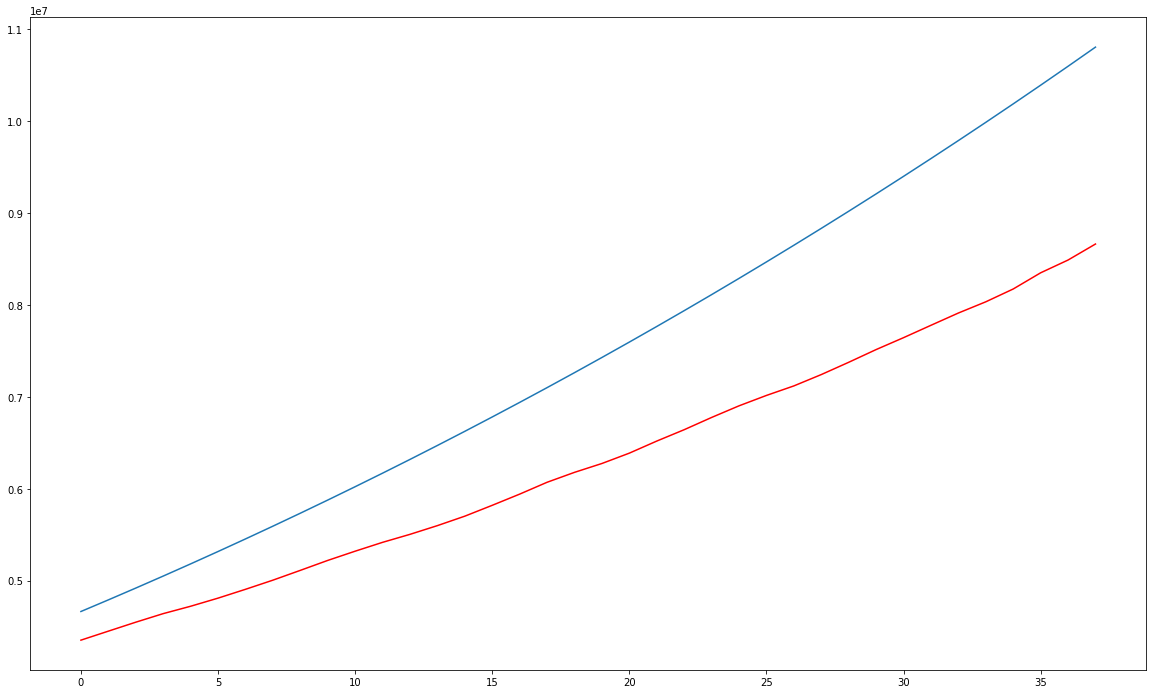

In [31]:
plt.plot(y_test_confirmed,color='red')
plt.plot(test_pred)